# Análise Dataset - UCI - BANK

In [1]:
## import das bibliotecas iniciais

import pandas as pd
import numpy as np

Link para baixar os dados: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [2]:
## importando dataset

df = pd.read_csv(r'C:\Users\pasch\Desktop\CURSOS\CLUBE_DS_ASSINATURA\Estudos_Individuais\PROJETOS_EBOOK\02\dados\UCI Machine Learning Repository - Bank.csv', sep=';')

print(f'Esse dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas')
df.head()

Esse dataset contém 4521 linhas e 17 colunas


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## 01 - Análises Descritivas Iniciais 

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
## visual

import matplotlib.pyplot as plt
import seaborn as sns

## 02- Distribuição da Idade

<Axes: xlabel='age'>

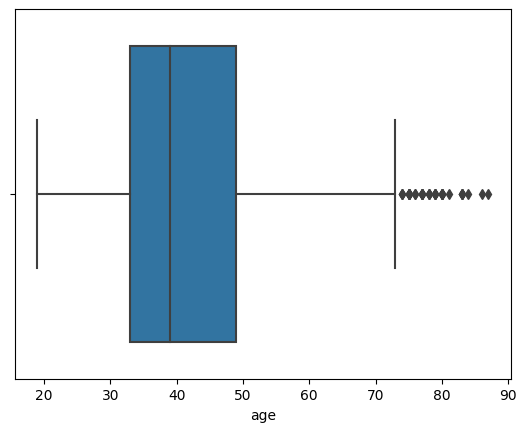

In [6]:
sns.boxplot(data=df, x='age')

Interessante notar que temos as idades dos clientes, em que até 75% dos clientes tem 49 anos, e há outliers nas idades mais altas, enquanto que o mínimo são 19 anos. 

In [7]:
df['job'].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

In [8]:
df['job'].value_counts(normalize=True)

job
management       0.214333
blue-collar      0.209246
technician       0.169874
admin.           0.105729
services         0.092236
retired          0.050874
self-employed    0.040478
entrepreneur     0.037160
unemployed       0.028312
housemaid        0.024773
student          0.018580
unknown          0.008405
Name: proportion, dtype: float64

Interessante notar que Administração é a profissão mais comum nos dados, enquanto que o termo empregado 'blue-collor' também é bem utilizado, e significa funcionários que realizam serviços técnicos - como operários de fábricas.

## 03 - Principais Formas de Contato

In [9]:
df['contact'].value_counts()

contact
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

In [10]:
df['contact'].value_counts(normalize=True)

contact
cellular     0.640566
unknown      0.292856
telephone    0.066578
Name: proportion, dtype: float64

#### Maior parte dos contatos é feita por celular - quase 65% do total.

## 04 - Relação Entre Saldo x Idade

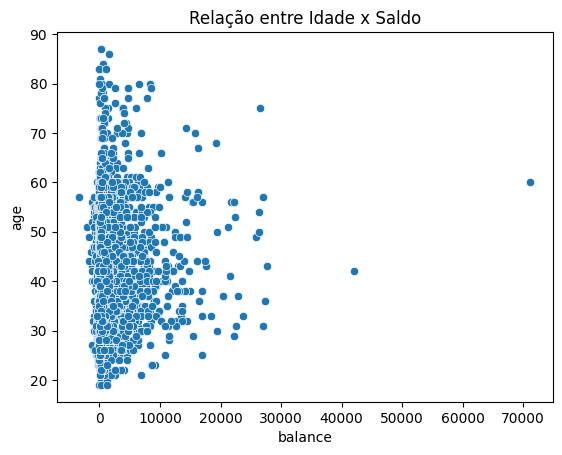

In [11]:
sns.scatterplot(data=df, x='balance', y='age')
plt.title('Relação entre Idade x Saldo')
plt.show()

Esse ponto é interessante, pois vemos que mesmo pessoas mais velhas, o saldo da conta não progride da forma esperada, ou seja, não há uma correlação - nem positiva e nem negativa entre os dados analisados

## 05 - Relação entre Saldo Médio x Habitação

In [12]:
saldo_medio = df.groupby('housing')['balance'].mean().reset_index()

saldo_medio

,housing,balance
0,no,1595.277268
1,yes,1290.309496


<Axes: xlabel='housing', ylabel='balance'>

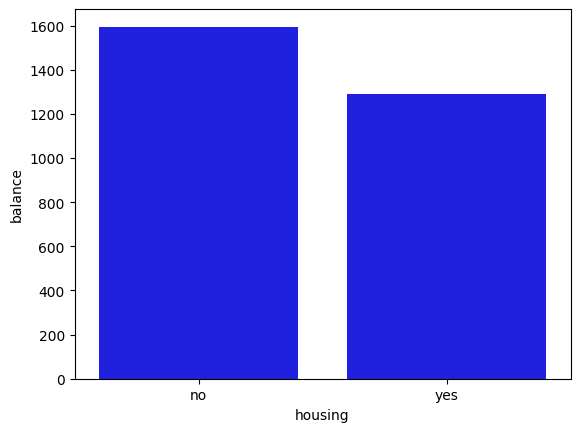

In [13]:
sns.barplot(data=saldo_medio, x='housing', y='balance', color='blue')

Esse dado é interessante, nós vemos que quem NÃO possui residência têm um saldo bancário maior, possivelmente deve ter relação com a possibilidade de financiamento, isso poderia ser melhor investigado.

## 06 - Relação Saldo Médio x Default

In [14]:
saldo_default = df.groupby('default')['balance'].mean().reset_index()

saldo_default

,default,balance
0,no,1450.550956
1,yes,-208.723684


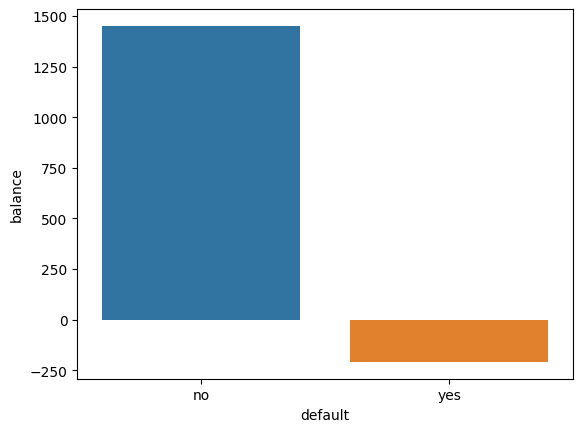

In [15]:
sns.barplot(data=saldo_default, x='default', y='balance');

Surpreendendo um total de "0" pessoas, as pessoas que estão inadimplentes têm uma média de saldo bancário negativo - triste realidade de nossas vidas hehe.

<Axes: xlabel='balance', ylabel='default'>

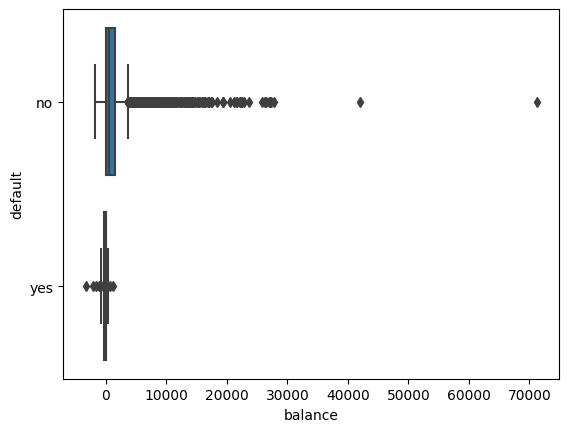

In [16]:
sns.boxplot(data=df, x='balance', y='default')

## 07 - Detecção de Outliers - Método IQT

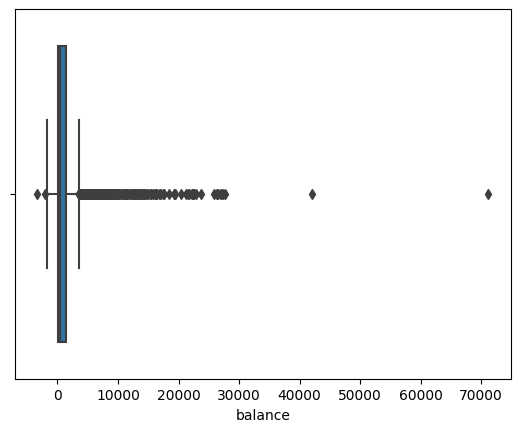

In [17]:
sns.boxplot(data=df, x='balance')
plt.show()

In [18]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Interessante avaliar os Outliers pelo Método Interquartil

In [19]:
## Selecionando os quartis

q1 = np.percentile(df['balance'], 25)
q3 = np.percentile(df['balance'], 75)

print(q1, q3)

69.0 1480.0


In [20]:
iqt = q3 - q1

iqt

1411.0

In [21]:
limite_inferior = q1 - (1.5 * iqt)

limite_superior = q3 + (1.5 * iqt)

print(limite_inferior, limite_superior)

-2047.5 3596.5


Com esses valores em mãos, sabemos que os primeiros 25% dos dados, estão entre - 2047.5 até 69, ou seja, o que estiver abaixo disso é Outlier.
Enquanto que 75% dos dados se encontram entre 1480 e 3596.5, acima disso também é considerado Outlier.

In [22]:
outlier_acima = df[df['balance']> limite_superior]

outlier_acima.shape

(504, 17)

In [23]:
outlier_abaixo = df[df['balance'] < limite_inferior]

outlier_abaixo.shape

(2, 17)

Interessante que temos 2 casos de Outliers negativos, abaixo do limite inferior, enquanto que acima do limite superior temos 504 indivíduos, mostrando como algumas pessoas destoam no saldo das métricas centrais.

In [24]:
outlier_acima.describe()

,age,balance,day,duration,campaign,pdays,previous
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,43.281746,7628.188492,16.313492,257.880952,2.831349,41.309524,0.710317
std,11.761378,5646.738441,7.884916,218.927754,2.965227,95.495420,1.879949
min,21.000000,3601.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,34.000000,4412.250000,11.000000,114.000000,1.000000,-1.000000,0.000000
50%,41.000000,5735.000000,17.000000,197.500000,2.000000,-1.000000,0.000000
75%,51.000000,8499.250000,21.000000,337.000000,3.000000,-1.000000,0.000000
max,80.000000,71188.000000,31.000000,1529.000000,25.000000,761.000000,15.000000


Engraçado ver a diferença de saldo médio quando olhamos apenas os Outliers em comparação com o público em geral.

## 08 - Alterando variável resposta 'y' -  para 0 e 1

In [25]:
df['y'] =  df['y'].replace({'no': 0, 'yes': 1})

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [27]:
df.groupby('default')['y'].count().reset_index()

,default,y
0,no,4445
1,yes,76


In [28]:
df.groupby('loan')['y'].mean().reset_index()

,loan,y
0,no,0.124804
1,yes,0.062229


In [29]:
df.groupby('default')['y'].mean().reset_index()

,default,y
0,no,0.115186
1,yes,0.118421


Interessante que entre as pessoas que ficaram ou não inadimplentes, a média de adquirir o produto é a mesma, enquanto que entre as pessoas que possuem ou não empréstimo, quem "não" tem empréstimo tem o dobro de chances de adquirir o produto.

## 09 - Correlação de Pearson

O método .corr() serve apenas para colunas numéricas, nesse caso vamos em um primeiro momento ignorar as colunas catégoricas, apesar de poder fazer um encoder para entender se há correlação também com essas colunas, mas vamos deixar para mexer nas colunas mais adiante.

In [30]:
df_num = df.select_dtypes(include='number')

df_num

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0
...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0
4517,57,-3313,9,153,1,-1,0,0
4518,57,295,19,151,11,-1,0,0
4519,28,1137,6,129,4,211,3,0


In [31]:
corr = df_num.corr()

corr

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511,0.045092
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196,0.017905
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114,-0.011244
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080,0.401118
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833,-0.061147
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562,0.104087
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000,0.116714
y,0.045092,0.017905,-0.011244,0.401118,-0.061147,0.104087,0.116714,1.000000


## 10 - Heatmap

Podemos visualizar a correlação mais facilmente usando um heatmap - mapa de calor

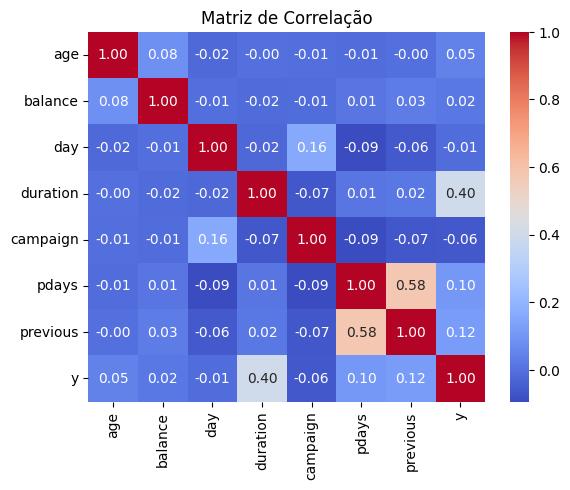

In [32]:
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Olhando através do mapa de calor podemos ver mais facilmente as correlaçõe, e parece que temos algumas interessantes, como "duration" e  a resposta "y"

## 11 - Probabilidade Condicional

Qual probabilidade de uma pessoa adquirir o produto e não ter tido contato antes?

Ou seja:

Queremos "y" = 1 (yes) e previous = 0

In [33]:
df.shape

(4521, 17)

Total de linhas do dataset = 4521

In [34]:
## probabilidade de previous = 0

df['previous'].value_counts()

previous
0     3705
1      286
2      193
3      113
4       78
5       47
6       25
7       22
8       18
9       10
12       5
10       4
11       3
14       2
24       1
22       1
23       1
17       1
18       1
15       1
13       1
19       1
20       1
25       1
Name: count, dtype: int64

In [35]:
## probabilidade de y = 1

df['y'].value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [36]:
df_sem_contato = df[df['previous'] == 0]

df_sem_contato['y'].value_counts()

y
0    3368
1     337
Name: count, dtype: int64

Ou seja, probabilidade de não ter tido contato é igual a 81,9%, enquanto que a probabilidade de NÃO ter tido contato E adquirir o produto é de 9,10%

Pois não ter tido contato são 3705 elementos, enquanto que dentro dessa população, temos que então filtrar quem adquiriu ou não, que no caso foram 337, ou seja 337/3705 e temos a probabilidade condicional.

## 12 - Projeto de Classificação

In [46]:
## bibliotecas necessárias

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

### 12.1 - Separação do Dataset

In [47]:
## rename da coluna 'y' para evitar confusão

df.rename(columns={'y': 'alvo'}, inplace=True)

In [48]:
## separação das features preditoras e do 'alvo'

X = df.drop(columns=['alvo'])
y = df['alvo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) ## stratify para manter as proporções

### 12.2 - Separação de Colunas Categóricas e Numéricas

In [49]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(include='O').columns

### 12.3 - Pipeline

In [59]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), ## insere a mediana nos valores nulos
    ('scaler', StandardScaler()) ## normaliza os dados para média 0 e desvio padrão 1
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), ## substitui nulos pelo mais frequente
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func = f_classif)), ## o 'k' será otimizado no GridSearch
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state = 42))
])

param_grid = {
    'feature_selection__k' : [5, 10, 15], ## testar diferentes quantidades de features
    'classifier__n_estimators' : [50, 100, 150, 200], ## número de árvores na RandomForest
    'classifier__max_depth' : [None, 10, 20] ## profundidade máxima das árvores
}

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)

## treinar o gridsearch

grid_search.fit(X_train, y_train)

## melhor modelo

print(f'Melhores parâmetros: {grid_search.best_params_}')

## Avaliação no conjunto de teste
y_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Melhores parâmetros: {'classifier__max_depth': 20, 'classifier__n_estimators': 50, 'feature_selection__k': 15}
Accuracy: 0.8574585635359117
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       801
           1       0.38      0.38      0.38       104

    accuracy                           0.86       905
   macro avg       0.65      0.65      0.65       905
weighted avg       0.86      0.86      0.86       905



O modelo mostra resultados que podem ser trabalhados, podemos ver que para classe '0' que é maioria, o modelo funcionou muito bem, com uma precisão de 92%, enquanto que para a classe '1' a precisão caiu para 38%, ou seja, provavelmente se implantarmos um ClassWeight poderiamos verificar alguma melhoria, em uma análise adicional também poderíamos mexer nos Thresholds.

### 12.4 - Matriz de Confusão

In [60]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

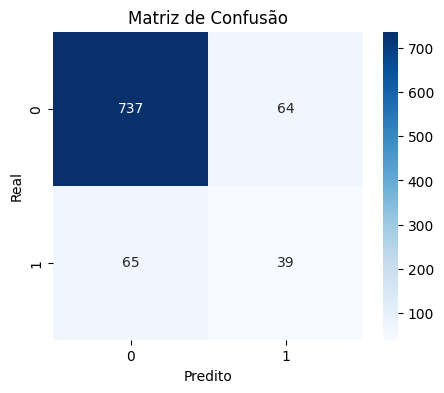

In [61]:
cm = confusion_matrix(y_test, y_pred)

## gráfico
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Como dissemos anteriormente, nosso modelo está errando muito em predizer quem faz parte da classe minoritária, cometendo Erro Tip II, Falso Negativo, modelo prevê que o dado pertence a classe majoritária, mas na verdade ele pertence a classe minoritária.
Muito possivelmente, pelo fato do dataset ser desbalanceado, ele pode causar esse viés no modelo.

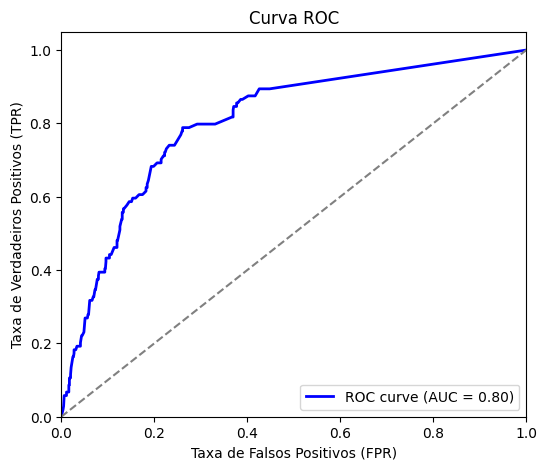

In [62]:
# Obter probabilidades da classe positiva
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calcular ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar curva ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

AUC em 0.80, ou seja, modelo com margem de melhoria - esse gráfico nos mostra como o modelo está separando as classes.